# Project 1: SAT & ACT Analysis

## Problem Statement
> The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT -
you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. 
Your presentation and report should be geared toward **non-technical** executives with the College Board and you will use the provided data 
and outside research to make recommendations about how the College Board might work to increase the participation rate in a **state of your choice**.

## Research Questions
Which states have the lowest scores for the ACT exam?
Which states have the lowest scores for the SAT exam?
Is there a correlation between the SAT Math score and the SAT ERW score?

## Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [2]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import os
from IPython.display import HTML, display
from IPython.display import Image

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [74]:
#Code:
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [75]:
#Code:
act_2017.head(10)


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [76]:
sat_2017.tail(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
41,South Dakota,3%,612,603,1216
42,Tennessee,5%,623,604,1228
43,Texas,62%,513,507,1020
44,Utah,3%,624,614,1238
45,Vermont,60%,562,551,1114
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer


In [77]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [78]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


The 2017 SAT included five features as follow: State, Participation rate, Writing and Reading, Math and Total. 


The 2017 ACT included 7 observations as follow: State, Participation, Reading, Science, English, Math and Composite.

    
The descibe() method provides descriptive statistics for each of the features as shown in the above table. These statistics include 
    minimum, maximum, mean,standard deviation scores, Q1, median and Q3, are also provided for each the SAT and ACT datasets. 


#### 4a. Does the data look complete? 

Data look complete. But lets take a deeper look at the columns name, data types later on and what we have.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [79]:
#Answer:
#Using the functions min() and max() find the minimum and maximum possible values for each features on both datasets for 2017.
    
#SAT 2017
sat_2017.min()


State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [80]:
#Answer:
#Using the functions min() and max() find the minimum and maximum possible values for each features on both datasets FOR 2017.
    
#ACT 2017
act_2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [81]:
#code
print(act_2017.dtypes)
print()
print(sat_2017.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Answer:
There are some issues with data. The data type for participationj isshowing as a string,
but really, the data is of float type. SimilarlyComposite should benumeric and not considered as a string.
The Evidence-Based Reading and Writing is spelled different than the in the original dataset. 
In the original dataset, it is spelled out as ERW.
All these issues need to be addressed in the following section.


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [127]:
#This function takes a string-type percentage, removes the percentage symbol, converts the remaining number to a float, 
#and divides by 100 to return the numerical representation of the percentage.
def participation_to_numeric(percentage_string): 
    participation = float(percentage_string[:-1])/100      #remove % sign with [:-1]
    return participation

#Converts the participation percentages into numerical format
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: participation_to_numeric(x))
act_2017['Participation'] = act_2017['Participation'].map(lambda x: participation_to_numeric(x))


In [83]:
#Let's verify the data type was changed
print(sat_2017.dtypes)
print()
print(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


- Fix any individual values preventing other columns from being the appropriate type.

In [84]:
#Let's now fix the data type for Composite variable. The code to fix the Composite data type
 #Remove 'x'
act_2017['Composite'] = act_2017['Composite'].map(lambda com_cell: com_cell.replace('x',''))

# Convert column to float
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [85]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [86]:
#code - let's use .rename method
sat_2017.rename(columns={
    'State': 'state',
    'Participation': 'participation_sat_17',
    'Evidence-Based Reading and Writing': 'erw_sat_17',
    'Math': 'math_sat_17',
    'Total': 'total_sat_17',
    }, inplace=True)
sat_2017.columns

Index(['state', 'participation_sat_17', 'erw_sat_17', 'math_sat_17',
       'total_sat_17'],
      dtype='object')

In [87]:
act_2017.rename(columns={
    'State': 'state',
    'Participation': 'participation_act_17',
    'English': 'english_act_17',
    'Math': 'math_act_17',
    'Reading': 'reading_act_17',
    'Science': 'science_act_17',
    'Composite': 'composite_act_17',
    }, inplace=True)
act_2017.columns

Index(['state', 'participation_act_17', 'english_act_17', 'math_act_17',
       'reading_act_17', 'science_act_17', 'composite_act_17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [88]:
final_sat_act_dic = {
    "Feature": ["state", "participation_sat_17", "erw_sat_17", "math_sat_17", "total_sat_17", "participation_act_17", "english_act_17", "math_act_17", "reading_act_17", "science_act_17", "composite_act_17", "participation_sat_18", "erw_sat_18", "math_sat_18", "total_sat_18", "participation_act_18", "composite_act_18", "math_sat_19", "ebrw_sat_19", "participation_sat_19", "total_sat_19", "participation_act_19", "composite_act_19"],
    "Type": ["object", "float", "integer", "integer", "integer", "float", "float", "float", "float", "float", "float", "float", "integer", "integer", "integer", "float", "float", "float", "integer", "integer", "integer", "float", "float"],

    "Dataset": ["SAT/ACT", "SAT", "SAT", "SAT", "SAT", "ACT", "ACT", "ACT", "ACT", "ACT", "ACT", "SAT", "SAT", "SAT", "SAT", "ACT", "ACT", "SAT", "SAT", "SAT", "SAT", "ACT","ACT"],



    "Description": ["Any given State", "SAT Participation Rate in a given state in 2017", "Mean score for SAT English/Writing in 2017", "Mean score for SAT Math in 2017 in a given state", "Mean total SAT score a given state",  "ACT Participation Rate in a given state in 2017", "Mean score for ACT English in 2017 in a given state", "Mean score for ACT Math in 2017 in a given state", "Mean score for ACT Reading in 2017 in a given state", "Mean score for ACT Science in 2017 in a given state", "Mean score for ACT Composite in 2017 in a given state", "SAT Participation Rate in a given state in 2018", "Mean score for SAT  English/Writing in 2018", "Mean score for SAT Math in 2018 in a given state", "Mean total SAT score a given state in 2018", "ACT Participation Rate in a given state in 2018", "Mean score for ACT Composite in 2018 in a given state", "Mean score for SAT Math in 2019 in a given state", "Mean score for SAT English/Writing in 2019", "SAT Participation Rate in a given state in 2019", "Mean total SAT score a given state", "ACT Participation Rate in a given state in 2019", "Mean score for ACT Composite in 2019 in a given state"]

}
final_sat_act_dic =  pd.DataFrame(final_sat_act_dic)
final_sat_act_dic

,Feature,Type,Dataset,Description
0,state,object,SAT/ACT,Any given State
1,participation_sat_17,float,SAT,SAT Participation Rate in a given state in 2017
2,erw_sat_17,integer,SAT,Mean score for SAT English/Writing in 2017
3,math_sat_17,integer,SAT,Mean score for SAT Math in 2017 in a given state
4,total_sat_17,integer,SAT,Mean total SAT score a given state
5,participation_act_17,float,ACT,ACT Participation Rate in a given state in 2017
6,english_act_17,float,ACT,Mean score for ACT English in 2017 in a given ...
7,math_act_17,float,ACT,Mean score for ACT Math in 2017 in a given state
8,reading_act_17,float,ACT,Mean score for ACT Reading in 2017 in a given ...
9,science_act_17,float,ACT,Mean score for ACT Science in 2017 in a given ...


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [89]:
#code, the extra row can be found in the ACT dataset. It is the first rwo with information about National scores
act_2017.drop(0, inplace=True, axis=0)

In [90]:
act_2017.head()

,state,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [91]:
#Code:
sat_act_2017 = pd.merge(sat_2017, act_2017, left_index=True, on = 'state')
sat_act_2017

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
1,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
10,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [92]:
#code
sat_act_2017.to_csv('./data/combined_2017.csv', encoding='utf-8', index = False)

In [93]:
combined_2017 = pd.read_csv('./data/combined_2017.csv')
combined_2017.head()

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [94]:
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018.csv')

In [95]:
#Let's look at sat_2018 data
print(sat_2018.head(5))
print()
print(act_2018.head(5))


        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

        State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7


In [96]:
#Fixixng the data type on the SAT 2018 dataset.

In [97]:
#let's take a look at the different columns. Participation need to be fixed.print
print(sat_2018.dtypes)
print()
print(act_2018.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
Composite        float64
dtype: object


In [98]:
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: participation_to_numeric(x))
act_2018['Participation'] = act_2018['Participation'].map(lambda x: participation_to_numeric(x))

In [99]:
#Now lets verify the change went through
print(sat_2018.dtypes)
print()
print(act_2018.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
Composite        float64
dtype: object


In [100]:
#Renaming sat_2018 columns
sat_2018.rename(columns={
    'State': 'state',
    'Participation': 'participation_sat_18',
    'Evidence-Based Reading and Writing': 'erw_sat_18',
    'Math': 'math_sat_18',
    'Total': 'total_sat_18',
    }, inplace=True)


In [101]:
#renaming act_2018 columns
act_2018.rename(columns={
    'State': 'state',
    'Participation': 'participation_act_18',
    'Composite': 'composite_act_18',
    }, inplace=True)


In [102]:
print(act_2018.columns)
print()
print(sat_2018.columns)

Index(['state', 'participation_act_18', 'composite_act_18'], dtype='object')

Index(['state', 'participation_sat_18', 'erw_sat_18', 'math_sat_18',
       'total_sat_18'],
      dtype='object')


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [103]:
sat_act_2018 = pd.merge(sat_2018, act_2018, left_index=True, on = 'state')
sat_act_2018.head()

,state,participation_sat_18,erw_sat_18,math_sat_18,total_sat_18,participation_act_18,composite_act_18
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [104]:
sat_act_2018.to_csv('./data/combined_2018.csv', encoding='utf-8', index = False)

In [105]:
combined_2018 = pd.read_csv('./data/combined_2018.csv')
combined_2018.head()

,state,participation_sat_18,erw_sat_18,math_sat_18,total_sat_18,participation_act_18,composite_act_18
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [106]:

#code to merge Combined_2017 and combined_2018 datasets

combined_17_c0mbined_18 = pd.merge(combined_2017, combined_2018, left_index=True, on = 'state')

combined_17_c0mbined_18.head(3)

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,erw_sat_18,math_sat_18,total_sat_18,participation_act_18,composite_act_18
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2


In [107]:
#Saving the merged product into the final dataset

combined_17_c0mbined_18.to_csv('./data/final.csv', encoding='utf-8', index = False)

In [108]:
final = pd.read_csv('./data/final.csv')
final.head()

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,participation_sat_18,erw_sat_18,math_sat_18,total_sat_18,participation_act_18,composite_act_18
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [109]:
#what are the features of the final dataset 
final.columns

Index(['state', 'participation_sat_17', 'erw_sat_17', 'math_sat_17',
       'total_sat_17', 'participation_act_17', 'english_act_17', 'math_act_17',
       'reading_act_17', 'science_act_17', 'composite_act_17',
       'participation_sat_18', 'erw_sat_18', 'math_sat_18', 'total_sat_18',
       'participation_act_18', 'composite_act_18'],
      dtype='object')

In [110]:
#final data type
final.dtypes

state                    object
participation_sat_17    float64
erw_sat_17                int64
math_sat_17               int64
total_sat_17              int64
participation_act_17    float64
english_act_17          float64
math_act_17             float64
reading_act_17          float64
science_act_17          float64
composite_act_17        float64
participation_sat_18    float64
erw_sat_18                int64
math_sat_18               int64
total_sat_18              int64
participation_act_18    float64
composite_act_18        float64
dtype: object

In [128]:
#Exploring 2019 SAT and ACT data
import pandas as pd
import numpy as np
sat_2019 = pd.read_csv('./data/sat_2019.csv', encoding='latin1')
act_2019 = pd.read_csv('./data/act_2019.csv', encoding='latin1')

In [129]:
#a look at ther first 3 rows for the sat_2019
sat_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [130]:
#a look at ther first 3 rows for the act_2019
act_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [114]:
#Let's take a look at the column of sat_2019
sat_2019.columns

Index(['State', 'Participation Rate', 'EBRW', 'Math', 'Total'], dtype='object')

In [124]:
print(act_2019.dtypes)
print()
print(sat_2019.dtypes)

State             object
Participation     object
Composite        float64
dtype: object

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object


In [131]:
#renaming sat_2019 columns
sat_2019.rename(columns={
    'State': 'state',
    'Participation Rate': 'participation_sat_19',
    'EBRW': 'ebrw_sat_19',
    'Math': 'math_sat_19',
    'Total': 'total_sat_19',
    }, inplace=True)
sat_2019.columns

Index(['state', 'participation_sat_19', 'ebrw_sat_19', 'math_sat_19',
       'total_sat_19'],
      dtype='object')

In [151]:
#This function takes a string-type percentage, removes the percentage symbol, converts the remaining number to a float, 
#and divides by 100 to return the numerical representation of the percentage.
# when I first run the code, it did not work, received the except: ValueError: could not convert string to float. 
#The reason was because I tried to convert a string that is not formatted as a float point number to a float.
# I solved that by adding a handler (try and except) that makes sure the code does not continue running if the user unserts an invalid value.
#careerkarma.com/blog/python-valueerror-could-not-convert-string-to-float/


def participation_to_numeric(percentage_string):
    try:                                                      
        participation = float(percentage_string[:-1])/100      #remove % sign with [:-1]
        return participation
    except:
        print('The value entered is not a validd value')


sat_2019['participation_sat_19'] = sat_2019['participation_sat_19'].map(lambda x: participation_to_numeric(x))

The value entered is not a validd value
The value entered is not a validd value


In [176]:
#looking at the data type for sat_2019. 
print(sat_2019.dtypes)
print()
print(act_2019.dtypes)

state                    object
participation_sat_19    float64
ebrw_sat_19               int64
math_sat_19               int64
total_sat_19              int64
dtype: object

state                    object
participation_act_19    float64
composite_act_19        float64
dtype: object


In [154]:
#renaming act_2019 columns
act_2019.rename(columns={
    'State': 'state',
    'Participation': 'participation_act_19',
    'Composite': 'composite_act_19',
    }, inplace=True)
act_2019.columns

Index(['state', 'participation_act_19', 'composite_act_19'], dtype='object')

### Combining act_2019 and sat_2019 dataset 

In [155]:
#Combining act_2019 and sat_2019 dataset 
sat_act_2019 = pd.merge(sat_2019, act_2019, left_index=True, on = 'state')
sat_act_2019.head()

,state,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19,participation_act_19,composite_act_19
0,Alabama,0.07,583,560,1143,1.00,18.9
1,Alaska,0.41,556,541,1097,0.38,20.1
2,Arizona,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.06,582,559,1141,1.00,19.3
4,California,0.63,534,531,1065,0.23,22.6


### Combining sat_act_2019 and final into sat_act_2019_final

In [156]:
sat_act_2019_final = pd.merge(final, sat_act_2019, left_index=True, on = 'state')
sat_act_2019_final

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,...,math_sat_18,total_sat_18,participation_act_18,composite_act_18,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19,participation_act_19,composite_act_19
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,506,1025,0.30,23.9,1.00,518,506,1024,0.27,23.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,519,1053,0.26,25.6,1.00,529,516,1046,0.22,25.5
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,492,998,0.17,23.8,1.00,499,486,985,0.13,24.1
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,549,1099,0.66,19.9,1.00,516,483,999,0.54,20.1
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,522,1064,0.53,21.4,0.71,538,519,1058,0.49,21.4


In [157]:
### Let's now save the combined into a csv file called final_sat_act
sat_act_2019_final.to_csv('./data/final_sat_act.csv', encoding='utf-8', index = False)

In [158]:
final_sat_act= pd.read_csv('./data/final_sat_act.csv')
final_sat_act.head()

,state,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,...,math_sat_18,total_sat_18,participation_act_18,composite_act_18,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19,participation_act_19,composite_act_19
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,571,1166,1.00,19.1,0.07,583,560,1143,1.00,18.9
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,544,1106,0.33,20.8,0.41,556,541,1097,0.38,20.1
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,572,1149,0.66,19.2,0.31,569,565,1134,0.73,19.0
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,576,1169,1.00,19.4,0.06,582,559,1141,1.00,19.3
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,536,1076,0.27,22.7,0.63,534,531,1065,0.23,22.6


In [159]:
final_sat_act.shape

(51, 23)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [177]:
# Now lets provide descriptive statistic
final_sat_act.describe()

,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,...,math_sat_18,total_sat_18,participation_act_18,composite_act_18,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19,participation_act_19,composite_act_19
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.397059,569.725490,548.235294,1127.313725,0.647843,20.927451,21.192157,22.011765,21.045098,21.521569,...,556.647059,1120.725490,0.612353,21.503922,0.491569,561.137255,552.627451,1113.823529,0.581569,21.480392
std,0.351126,44.679784,84.437335,90.520382,0.328063,2.347942,1.994878,2.064524,3.185675,2.023395,...,47.189331,93.191433,0.346483,2.120279,0.388697,45.823583,50.760993,96.259380,0.351046,2.212150
min,0.020000,503.000000,52.000000,996.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,...,486.000000,998.000000,0.070000,17.700000,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,...,522.500000,1057.500000,0.270000,19.950000,0.055000,527.500000,511.500000,1038.000000,0.235000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,0.660000,21.300000,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,...,593.500000,1204.000000,1.000000,23.750000,0.820000,612.000000,599.000000,1210.000000,1.000000,23.900000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,25.600000,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [175]:
#code
#To find the standard deviation, we will first calculate the mean
def calc_mean(data):
    count = 0 # sum of all values
    n = len(data) # number of values
    if n == 0: # return an error if list is empty
        return 'Error. List of values cannot be empty.'
    for i in range(n): # calculates the sum of all values
        count += data[i]
    mean = count/n # mean = sum of all values divided by number of values
    return mean # return mean


def calc_st_dev(data):
    n = len(data) # number of values
    if n == 0: # list passed as parameter cannot be empty
        return 'Error. List of values cannot be empty.'
    # standard deviation to be calculated
    ss = 0 # sum of differences squared
    mean = calc_mean(data) # mean of all values
    for i in range(n): # calculates sum of differences squared
        ss += (data[i] - mean) ** 2
    st_dev = ((1/n)*ss) ** 0.5 # calculates the st.dev. using the above formula
    return round(st_dev)


In [162]:
data = [1,2,3,5,6,7]

print(calc_st_dev(data))

2


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [174]:
#let's review again the data type for each column
final_sat_act.describe()

,participation_sat_17,erw_sat_17,math_sat_17,total_sat_17,participation_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17,...,math_sat_18,total_sat_18,participation_act_18,composite_act_18,participation_sat_19,ebrw_sat_19,math_sat_19,total_sat_19,participation_act_19,composite_act_19
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.397059,569.725490,548.235294,1127.313725,0.647843,20.927451,21.192157,22.011765,21.045098,21.521569,...,556.647059,1120.725490,0.612353,21.503922,0.491569,561.137255,552.627451,1113.823529,0.581569,21.480392
std,0.351126,44.679784,84.437335,90.520382,0.328063,2.347942,1.994878,2.064524,3.185675,2.023395,...,47.189331,93.191433,0.346483,2.120279,0.388697,45.823583,50.760993,96.259380,0.351046,2.212150
min,0.020000,503.000000,52.000000,996.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,...,486.000000,998.000000,0.070000,17.700000,0.020000,483.000000,460.000000,943.000000,0.060000,17.900000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,...,522.500000,1057.500000,0.270000,19.950000,0.055000,527.500000,511.500000,1038.000000,0.235000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,0.660000,21.300000,0.540000,550.000000,546.000000,1097.000000,0.540000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,...,593.500000,1204.000000,1.000000,23.750000,0.820000,612.000000,599.000000,1210.000000,1.000000,23.900000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,1.000000,25.600000,1.000000,636.000000,648.000000,1284.000000,1.000000,25.500000


In [179]:
#Code:
{
"SAT_Participation_17": calc_st_dev(final["participation_sat_17"]), 
"SAT_Erw_17 ": calc_st_dev(final["erw_sat_17"]),
"SAT_Math_17": calc_st_dev(final["math_sat_17"]),
"SAT_Total_17 ": calc_st_dev(final["total_sat_17"]),
"ACT_Participation_17": calc_st_dev(final["participation_act_17"]),
"ACT_English_17": calc_st_dev(final["english_act_17"]),
"ACTT_Math_17": calc_st_dev(final["math_act_17"]),
"ACT_Reading_17": calc_st_dev(final["reading_act_17"]),
"ACT_Science_17": calc_st_dev(final["science_act_17"]),
"ACT_Composite_17": calc_st_dev(final["composite_act_17"]),
"SAT_Participation_18": calc_st_dev(final["participation_sat_18"]),
"SAT_Erw_18 ": calc_st_dev(final["erw_sat_18"]),
"SAT_Math_18": calc_st_dev(final["math_sat_18"]),
"SAT_Total_18": calc_st_dev(final["total_sat_18"]),
"ACT_Participation_18": calc_st_dev(final["participation_act_18"]),
"ACT_Composite_18": calc_st_dev(final["composite_act_18"]),
}

{'SAT_Participation_17': 0,
 'SAT_Erw_17 ': 44,
 'SAT_Math_17': 84,
 'SAT_Total_17 ': 90,
 'ACT_Participation_17': 0,
 'ACT_English_17': 2,
 'ACTT_Math_17': 2,
 'ACT_Reading_17': 2,
 'ACT_Science_17': 3,
 'ACT_Composite_17': 2,
 'SAT_Participation_18': 0,
 'SAT_Erw_18 ': 47,
 'SAT_Math_18': 47,
 'SAT_Total_18': 92,
 'ACT_Participation_18': 0,
 'ACT_Composite_18': 2}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## What are the trends in state participation in either SAT or ACT test?
ACT state participation is wining over SAT participation. SAT rates remained stay from year to year. 

### Highest and lowest SAT state participation rate in 2017 and 2018
- lowest state participation rate in 2917: North Dakota state, Mississipi, and Iowa with a rate of 30% 
- lowest state participation rate in 2918: North Dakota
- lowest state participation rate in 2919: North Dakota, followed by Wyoming, South Dakota and South Dakota
This is interesting as I the case of North Dakota having the lowest participation rates, requires attention. 

In [181]:

#Investigate trends in the data, states with the lowest participation rates for 2017 SAT

final_sat_act[['state', 'participation_sat_17']].sort_values('participation_sat_17', ascending = True).head(10)

,state,participation_sat_19
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
14,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
16,Kentucky,0.04


In [202]:
#Investigate trends in the data, states with the highest participation rates for 2017 SAT

final_sat_act[['state', 'participation_sat_17']].sort_values('participation_sat_17', ascending = False).head(10)

,state,participation_sat_17
7,Delaware,1.00
22,Michigan,1.00
6,Connecticut,1.00
29,New Hampshire,0.96
19,Maine,0.95
18,Maine,0.95
11,Idaho,0.93
8,Florida,0.83
21,Massachusetts,0.76
39,Rhode Island,0.71


In [203]:
#Investigate trends in the data, states with the lowest participation rates for 2018 SAT

final_sat_act[['state', 'participation_sat_18']].sort_values('participation_sat_18', ascending = True).head(10)

,state,participation_sat_18
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
14,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
17,Louisiana,0.04


In [204]:
#Investigate trends in the data, states with the highest participation rates for 2018 SAT

final_sat_act[['state', 'participation_sat_18']].sort_values('participation_sat_18', ascending = False).head(10)

,state,participation_sat_18
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
11,Idaho,1.00
19,Maine,0.99
18,Maine,0.99
12,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96


### Highest and lowest  ACT state participation rate in 2017, 2018, and 2019

In [206]:
#Investigate trends in the data, states with the lowest participation rates for 2017 ACT

final_sat_act[['state', 'participation_act_17']].sort_values('participation_act_17').head(10)

,state,participation_act_17
18,Maine,0.08
19,Maine,0.08
7,Delaware,0.18
29,New Hampshire,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
47,Washington,0.29
46,Virginia,0.29
22,Michigan,0.29


In [207]:
#Investigate trends in the data, states with the highest participation rates for 2017 ACT

final_sat_act[['state', 'participation_act_17']] .sort_values('participation_act_17', ascending = False).head(20)

,state,participation_act_17
0,Alabama,1.00
16,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [208]:
#Investigate trends in the data, states with the lowest participation rates for 2018 ACT

final_sat_act[['state','participation_act_18']].sort_values('participation_act_18').head(10)

,state,participation_act_18
0,Alabama,100%
44,Utah,100%
42,Tennessee,100%
40,South Carolina,100%
36,Oklahoma,100%
35,Ohio,100%
33,North Carolina,100%
28,Nevada,100%
27,Nebraska,100%
26,Montana,100%


In [209]:
#Investigate trends in the data, states with the highest participation rates for 2018 ACT

final_sat_act[['state', 'participation_act_18']].sort_values('participation_act_18', ascending = False).head(20)

,state,participation_act_18
23,Minnesota,99%
34,North Dakota,98%
10,Hawaii,89%
41,South Dakota,77%
15,Kansas,71%
18,Maine,7%
19,Maine,7%
14,Iowa,68%
31,New Mexico,67%
2,Arizona,66%


In [210]:
#Investigate trends in the data, states with the lowest participation rates for 2019 ACT

final_sat_act[['state','participation_act_19']].sort_values('participation_act_19').head(10)

,state,participation_act_19
18,Maine,0.06
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17
22,Michigan,0.19
45,Vermont,0.20
46,Virginia,0.21
21,Massachusetts,0.21


In [211]:
#Investigate trends in the data, states with the lowest participation rates for 2019 ACT

final_sat_act[['state','participation_act_19']].sort_values('participation_act_19').head(10)

,state,participation_act_19
18,Maine,0.06
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17
22,Michigan,0.19
45,Vermont,0.20
46,Virginia,0.21
21,Massachusetts,0.21


#### Interpretation¶
We can see from the above that, ACT state participation rate is high throughout the
years 2017/2018 as compared to the SAT participation rate, with a pic in 2018 where 
around 17 states having 100% participation. North Dakota, Mississipi, Iowa reamined 
the states with the lowest SAT participation in 2017. Maine has the lowestACT participation.

#### Summary of the observation
- lowest state participation rate in 2917: North Dakota state, Mississipi, and Iowa with a rate of 30% 
- lowest state participation rate in 2918: North Dakota with a participation rate of 20%
- lowest state participation rate in 2919: North Dakota (participation rate of 20%), followed by 
Wyoming, South Dakota and South Dakota(participation rate of 30%)

### Lets now look at state with vs. le mean total/composite

In [182]:
final_sat_act.columns

Index(['state', 'participation_sat_17', 'erw_sat_17', 'math_sat_17',
       'total_sat_17', 'participation_act_17', 'english_act_17', 'math_act_17',
       'reading_act_17', 'science_act_17', 'composite_act_17',
       'participation_sat_18', 'erw_sat_18', 'math_sat_18', 'total_sat_18',
       'participation_act_18', 'composite_act_18', 'participation_sat_19',
       'ebrw_sat_19', 'math_sat_19', 'total_sat_19', 'participation_act_19',
       'composite_act_19'],
      dtype='object')

### state with the lowest mean total 2017

In [210]:
#state with the lowest mean total participation
final_sat_act[['state', 'participation_sat_17', 'total_sat_17']].sort_values('total_sat_17').head(10)

,state,participation_sat_17,total_sat_17
7,Delaware,1.00,996
11,Idaho,0.93,1005
22,Michigan,1.00,1005
19,Maine,0.95,1012
18,Maine,0.95,1012
8,Florida,0.83,1017
43,Texas,0.62,1020
6,Connecticut,1.00,1041
36,Oklahoma,0.07,1047
9,Georgia,0.61,1050


In [211]:
#state with the highest mean total participation
final_sat_act[['state', 'participation_sat_17','total_sat_17']].sort_values('total_sat_17', ascending=False).head(10)

,state,participation_sat_17,total_sat_17
23,Minnesota,0.03,1295
49,Wisconsin,0.03,1291
14,Iowa,0.02,1275
25,Missouri,0.03,1271
15,Kansas,0.04,1260
34,North Dakota,0.02,1256
27,Nebraska,0.03,1253
16,Kentucky,0.04,1247
24,Mississippi,0.02,1242
44,Utah,0.03,1238


### state with the lowest mean total 2018

In [229]:
#state with the lowest mean total participation 2018
final_sat_act[['state', 'participation_sat_18', 'total_sat_18']].sort_values('total_sat_18', ascending=True).head(10)

,state,participation_sat_18,total_sat_18
7,Delaware,1.00,998
48,West Virginia,0.28,999
11,Idaho,1.00,1001
10,Hawaii,0.56,1010
44,Utah,0.04,1010
22,Michigan,1.00,1011
18,Maine,0.99,1013
19,Maine,0.99,1013
39,Rhode Island,0.97,1018
12,Illinois,0.99,1019


In [212]:
#state with the highest mean total participation 2018
final_sat_act[['state', 'participation_sat_18','total_sat_18']].sort_values('total_sat_18', ascending=False).head(10)

,state,participation_sat_18,total_sat_18
23,Minnesota,0.04,1298
49,Wisconsin,0.03,1294
34,North Dakota,0.02,1283
14,Iowa,0.03,1265
15,Kansas,0.04,1265
25,Missouri,0.04,1262
50,Wyoming,0.03,1257
27,Nebraska,0.03,1252
16,Kentucky,0.04,1248
41,South Dakota,0.03,1240


In [ ]:
#### Interpretation
From the four tables above, we can see that state with the lowest mean
SAT total score are the one with the highest participation rate(Delaware, Idaho, and Michigan in 2017). 
On the other we also see that states with higher mean total score have a relatively low participation rate  

### state with the lowest mean total 2019

In [202]:
#state with the lowest mean total participation 2018
final_sat_act[['state', 'participation_sat_17','total_sat_19']].sort_values('total_sat_19', ascending=True).head(10)

,state,participation_sat_17,total_sat_19
48,West Virginia,0.14,943
36,Oklahoma,0.07,963
7,Delaware,1.00,985
11,Idaho,0.93,993
39,Rhode Island,0.71,995
8,Florida,0.83,999
22,Michigan,1.00,1003
19,Maine,0.95,1013
18,Maine,0.95,1013
12,Illinois,0.09,1013


### state with the highest mean total 2019

In [203]:
#state with the higest mean total participation 2018
final_sat_act[['state', 'participation_sat_17','total_sat_19']].sort_values('total_sat_19', ascending=False).head(10)

,state,participation_sat_17,total_sat_19
23,Minnesota,0.03,1284
49,Wisconsin,0.03,1283
41,South Dakota,0.03,1268
34,North Dakota,0.02,1263
27,Nebraska,0.03,1260
14,Iowa,0.02,1244
15,Kansas,0.04,1241
50,Wyoming,0.03,1238
24,Mississippi,0.02,1237
25,Missouri,0.03,1236


In [ ]:
#### Interpretation:
From the above, the same scenario can also be observed.

### state with the lowest mean composite 2017/2018/2019

In [220]:
#state with the lowest mean composite in 2017

final_sat_act[['state', 'participation_act_17','composite_act_17']].sort_values('composite_act_17', ascending=True).head(10)


,state,participation_act_17,composite_act_17
28,Nevada,1.00,17.8
24,Mississippi,1.00,18.6
40,South Carolina,1.00,18.7
10,Hawaii,0.90,19.0
33,North Carolina,1.00,19.1
0,Alabama,1.00,19.2
3,Arkansas,1.00,19.4
36,Oklahoma,1.00,19.4
17,Louisiana,1.00,19.5
2,Arizona,0.62,19.7


In [230]:
#state with the highest mean composite in 2017
final_sat_act[['state', 'participation_act_17','composite_act_17']].sort_values('composite_act_17', ascending=False).head(10)

,state,participation_act_17,composite_act_17
29,New Hampshire,0.18,25.5
21,Massachusetts,0.29,25.4
6,Connecticut,0.31,25.2
19,Maine,0.08,24.3
18,Maine,0.08,24.3
32,New York,0.31,24.2
22,Michigan,0.29,24.1
7,Delaware,0.18,24.1
39,Rhode Island,0.21,24.0
30,New Jersey,0.34,23.9


In [235]:
#state with the lowest mean composite in 2018
final_sat_act[['state', 'participation_sat_18','composite_act_18']].sort_values('composite_act_18', ascending=True).head(10)

,state,participation_sat_18,composite_act_18
28,Nevada,0.23,17.7
40,South Carolina,0.55,18.3
24,Mississippi,0.03,18.6
10,Hawaii,0.56,18.9
0,Alabama,0.06,19.1
33,North Carolina,0.52,19.1
2,Arizona,0.29,19.2
17,Louisiana,0.04,19.2
36,Oklahoma,0.08,19.3
3,Arkansas,0.05,19.4


In [234]:
#state with the highest mean composite in 2018
final_sat_act[['state', 'participation_sat_18','composite_act_18']].sort_values('composite_act_18', ascending=False).head(10)

,state,participation_sat_18,composite_act_18
6,Connecticut,1.00,25.6
21,Massachusetts,0.80,25.5
29,New Hampshire,0.96,25.1
32,New York,0.79,24.5
39,Rhode Island,0.97,24.2
22,Michigan,1.00,24.2
45,Vermont,0.64,24.1
18,Maine,0.99,24.0
19,Maine,0.99,24.0
5,Colorado,1.00,23.9


#### Interpretation
From the above, we can see the same scenario like previously. the higher the mean composite, the lower the states participation.
When the ACT scores drop, state participation rates increase.

## Visualize the data

There is not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

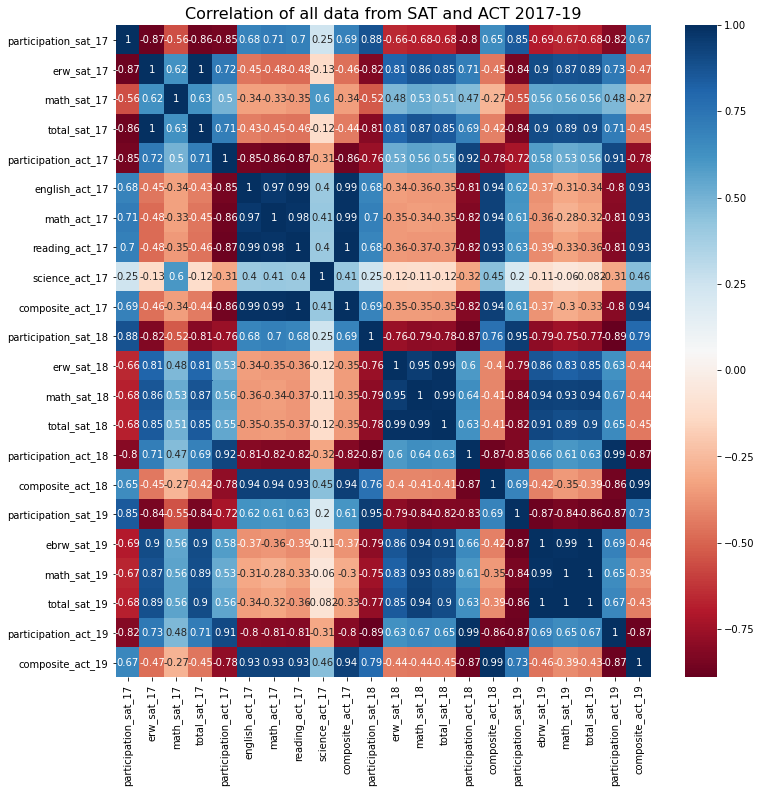

In [254]:
#Seaborn Heatmap visualizes correlation between all numeric features

plt.figure(figsize=(12, 12))
plt.title('Correlation of all data from SAT and ACT 2017-19', size=16)
sns.heatmap(final_sat_act.corr(), annot = True, cmap="RdBu");


In [ ]:
Interpretation:
- Mean scores for sections of the SAT are moderately negatively correlated with mean scores on ACT. 
- participation rates on a given test is highly negatively correlated with a r ~ -08 to the mean scores of the sections of that given test.
Again, this confirms the previousn results where state participation rates decresed when the mean score of the section of a given test.


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [255]:
# Histogram for Participation rates for SAT & ACT
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(10, 10))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
       

In [239]:
final_sat_act.columns

Index(['state', 'participation_sat_17', 'erw_sat_17', 'math_sat_17',
       'total_sat_17', 'participation_act_17', 'english_act_17', 'math_act_17',
       'reading_act_17', 'science_act_17', 'composite_act_17',
       'participation_sat_18', 'erw_sat_18', 'math_sat_18', 'total_sat_18',
       'participation_act_18', 'composite_act_18', 'participation_sat_19',
       'ebrw_sat_19', 'math_sat_19', 'total_sat_19', 'participation_act_19',
       'composite_act_19'],
      dtype='object')

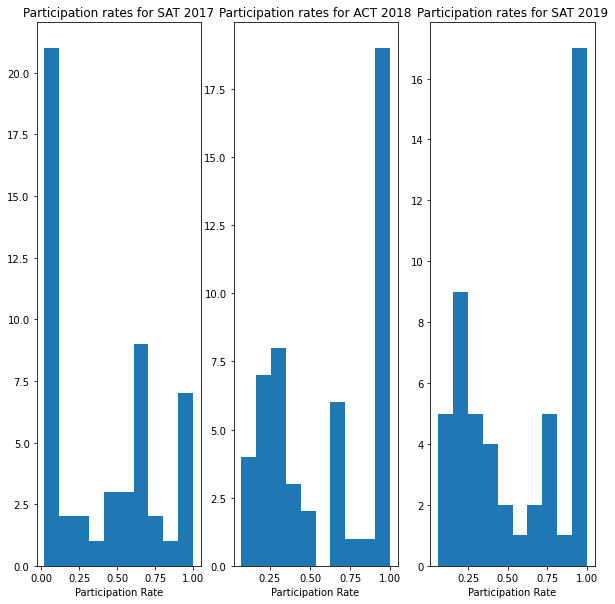

In [259]:
subplot_histograms(
    final_sat_act,
    ['participation_sat_17','participation_act_18','participation_act_19'],
    ['Participation rates for SAT 2017','Participation rates for ACT 2018','Participation rates for SAT 2019'],
    ['Participation Rate','Participation Rate', 'Participation Rate'],

)

In [ ]:
We can see here that the states participation rate of 100% for 
SAT is less as compared to the participation rate for the ACT.

In [ ]:
For SAT EWB scores, the distribution is bimodal, meaning that students perform either very well or below average.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


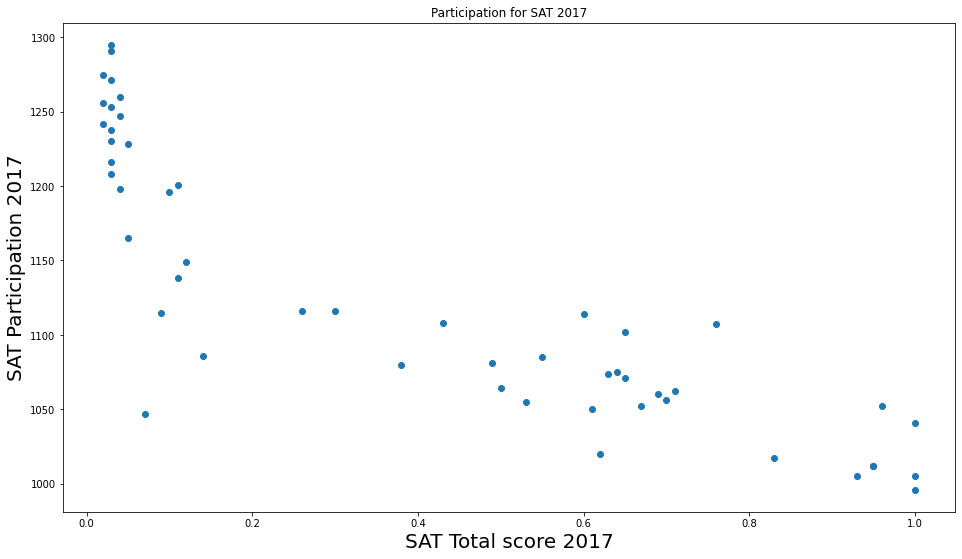

In [264]:
#scatterplot for Total scores for SAT 2017 vs. 2018
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(final_sat_act['participation_sat_17'],
         final_sat_act['total_sat_17'])

plt.title('Participation for SAT 2017')
plt.ylabel("SAT Participation 2017", fontsize = 20)
plt.xlabel("SAT Total score 2017", fontsize = 20);

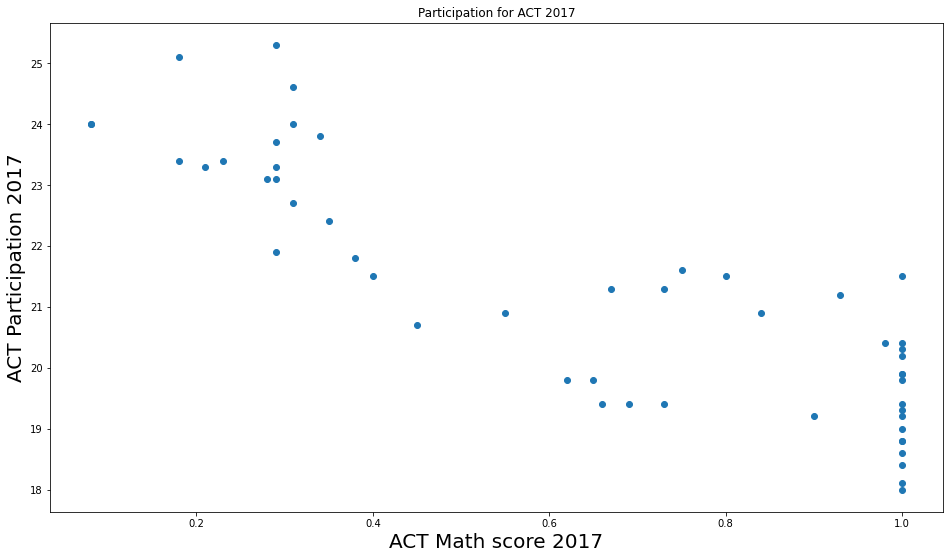

In [270]:
#scatterplot for Total scores for SAT 2017 vs. 2018
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(final_sat_act['participation_act_17'],
           final_sat_act['math_act_17'])

plt.title('Participation for ACT 2017')
plt.ylabel('ACT Participation 2017', fontsize = 20)
plt.xlabel('ACT Math score 2017', fontsize = 20);

#### Interpretation
We can see on the above 2 plots a negative relationship between SAT participation and ACT participation, ACT participation, SAT Total Score. Which is similar to the previous observation. State with the lower participation rates  see higher mean score by state.

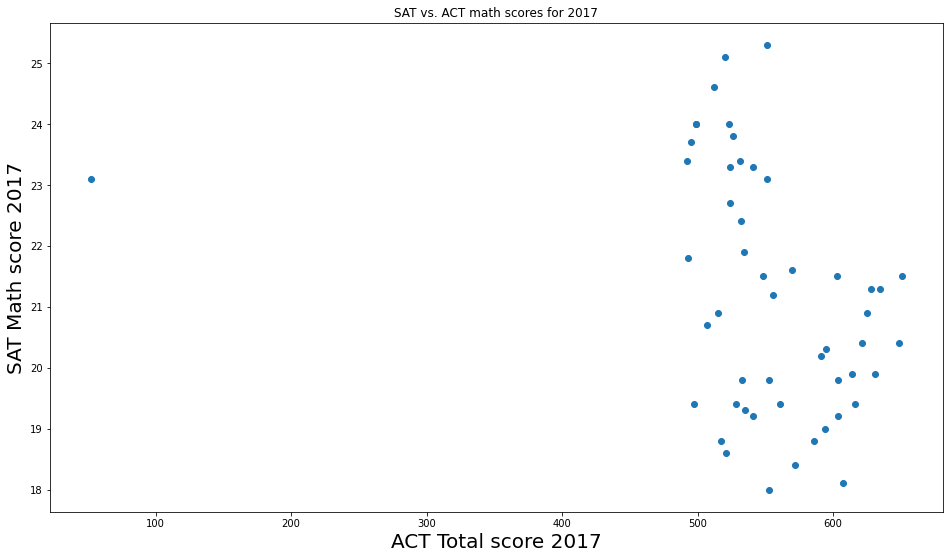

In [271]:

#SAT vs. ACT math scores for 2017
plt.figure(figsize=(16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(final_sat_act['math_sat_17'],
           final_sat_act['math_act_17'])

plt.title("SAT vs. ACT math scores for 2017")
plt.ylabel("SAT Math score 2017", fontsize = 20)
plt.xlabel("ACT Total score 2017", fontsize = 20);

Interpretation: the data collected above do not show any pattern between the SAT and ACT math scores. Therefore, there is no association between these two features.

Interpretation: the data collected above do not show no association between ACT and SAT Verbal/Reading scores in 2017.

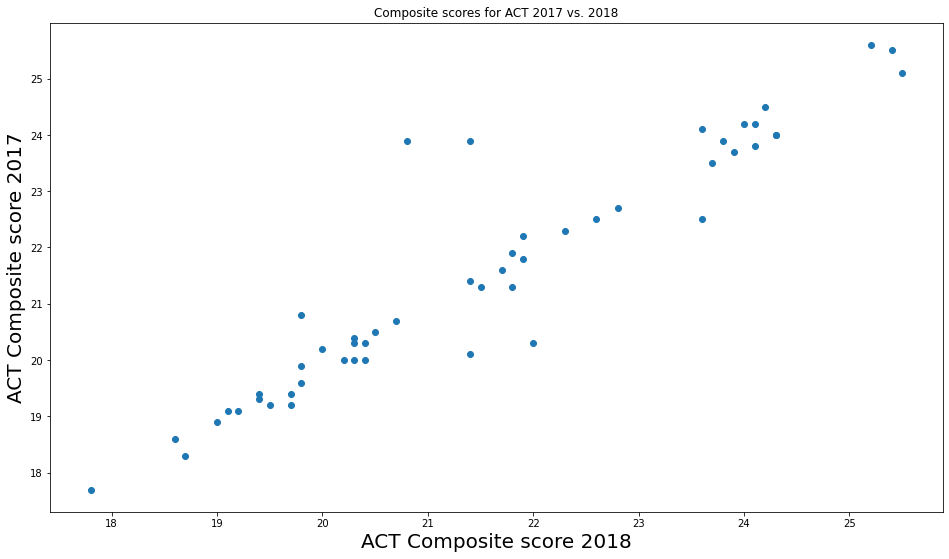

In [272]:

#Composite scores for ACT 2017 vs. 2018
plt.figure(figsize=(16, 9))
plt.scatter(final_sat_act['composite_act_17'],
           final_sat_act['composite_act_18'])

plt.title("Composite scores for ACT 2017 vs. 2018")
plt.ylabel("ACT Composite score 2017", fontsize = 20)
plt.xlabel("ACT Composite score 2018", fontsize = 20);

Interpretation: We can see a very strong uphill pattern as we move from left to right. this indicates a positive relationship
    between the ACT composite score in 2017 and the score in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

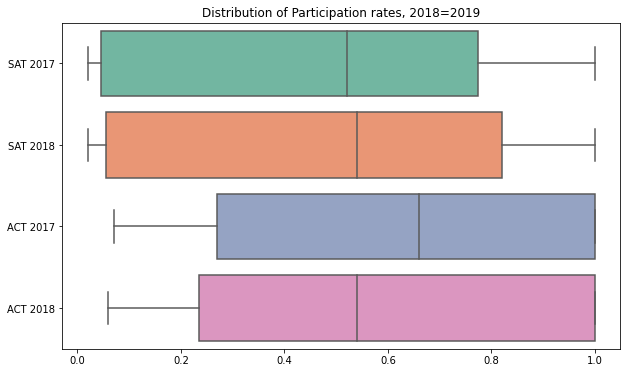

In [273]:
#Boxplot for ACT and SAT participation rates, 2018 and 2019 (4 vars)
participation_rates = final_sat_act.loc[:,["participation_sat_18","participation_sat_19","participation_act_18","participation_act_19"]]
participation_rates = participation_rates.rename(columns={
"participation_sat_18":"SAT 2017",
"participation_sat_19":"SAT 2018",
"participation_act_18":"ACT 2017",
"participation_act_19":"ACT 2018"

})
plt.figure(figsize=(10,6))
plt.title("Distribution of Participation rates, 2018=2019")
sns.boxplot(data=participation_rates,orient='h',palette='Set2');


#### Interpretation
on thiese plots, we can see that the distribution of ACT accross the states 
is significantly centered, than the SAT
  

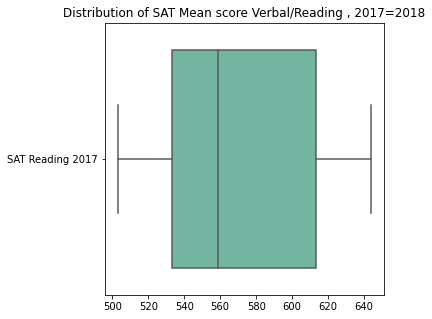

In [275]:
participation_rates = final_sat_act.loc[:,["erw_sat_17"]]
participation_rates = participation_rates.rename(columns={
"erw_sat_17":"SAT Reading 2017",

})
plt.figure(figsize=(5,5))
plt.title("Distribution of SAT Mean score Verbal/Reading , 2017=2018")
sns.boxplot(data=participation_rates,orient='h',palette='Set2');

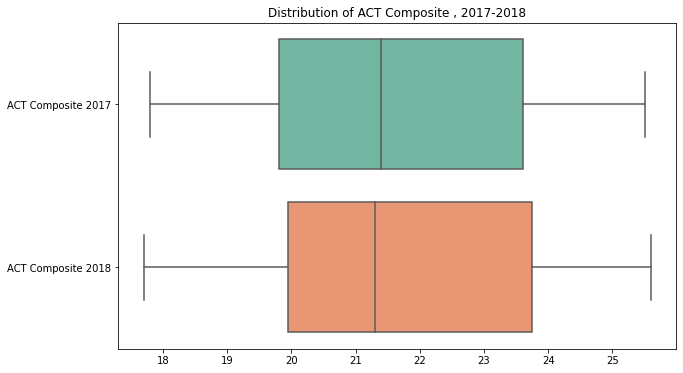

In [279]:
participation_rates = final_sat_act.loc[:,["composite_act_17","composite_act_18"]]
participation_rates = participation_rates.rename(columns={
"composite_act_17":"ACT Composite 2017",
"composite_act_18":"ACT Composite 2018"
})
plt.figure(figsize=(10,6))
plt.title("Distribution of ACT Composite , 2017-2018")
sns.boxplot(data=participation_rates,orient='h',palette='Set2');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Will federal and states' policies and regulation increase SAT/ACT state participation?

This is interesting question. The analysis of the data shows a trend in the distribution
of ACT/SAT accross the country. SAT states participation is being the low with North Dakota 
state with the lowest score. According to a recent publication of Catherine Gewertarticle on 
EducationWeek, the US Departmentof Education has granted North Dakota permission to use a new kind 
of testing flexibility in federal law, which gives schools districts in North Dakota state and/or any 
other states school distric the choice of using the SAT or ACT instead of state-mandated high schools
tests.The reoprt says that with this law in place, districts can stop giving their states required 
high school test and give a "nationally recognized". I believe this is a urge opportunity for states to increase
their test participation.

## Conclusions and Recommendations

- There is no association between ACT and SAT scores on Math
- There is a weak relationship between ACT Reading/Writing and SAT Reading/Writing
- There is a strong relationship between SAT scores in 2017 and 2018
- States with the lowest SAT scores include: North Dakota, Mississippi, Iowa
- States with highest SAT scores include: Delaware, Michigan, Connecticut, Colorado, Idaho
- States with the lowest ACT scores include: Maine
- States with highest ACT scores include: Alabama, Kentucky, Wisconcin, Utah, Tennessee, South Carolina
    
    
- Federal and states agencies play an important role in increasing the states participation to SAT/ACT. 
- More states should follow North Dakota state's path

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: